In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google. colab import files

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 


In [4]:
filename = '/content/drive/MyDrive/Coding Dojo Data Science/PandasForDataManipulation/clean_sales_predictions.csv'
data = pd.read_csv(filename)
data.head()

,Unnamed: 0,Product ID,Weight,Low Fat or Regular,Visibility,Product Category,Product List Price,Store ID,Year Opened,Area of Store,Grocery Store or Supermarket,Item_Outlet_Sales,Size of Store
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,Medium
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,Medium
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,Medium
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,Medium
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,High


Data Clean Up

In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data.head()

,Product ID,Weight,Low Fat or Regular,Visibility,Product Category,Product List Price,Store ID,Year Opened,Area of Store,Grocery Store or Supermarket,Item_Outlet_Sales,Size of Store
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,Medium
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,Medium
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,Medium
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,Medium
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,High


In [7]:
data.shape

(8523, 12)

In [8]:
data['Size of Store'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [9]:
data.replace({'Size of Store':{'Low':'Small', 'High':'Large'}}, inplace=True)

In [10]:
data['Size of Store'].unique()

array(['Medium', 'Large', 'Small'], dtype=object)

In [11]:
data['Low Fat or Regular'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
data['Low Fat or Regular']=data['Low Fat or Regular'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

In [13]:
data['Low Fat or Regular'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
data['Grocery Store or Supermarket'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [15]:
data['Grocery Store or Supermarket']=data['Grocery Store or Supermarket'].replace({'Supermarket Type1':'Supermarket','Supermarket Type2':'Supermarket', 'Supermarket Type3':'Supermarket'})

In [16]:
data['Grocery Store or Supermarket'].unique()

array(['Supermarket', 'Grocery Store'], dtype=object)

Data Visual Observations

In [17]:
sns.set()

30% of all products weigh around 12lbs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


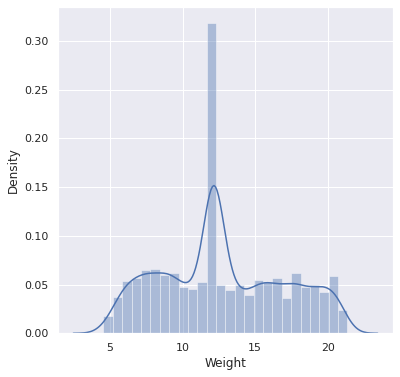

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(data['Weight']);
plt.show()
plt.savefig('Weight Distribution.png', dpi=300)
#files.download('Weight Distribution.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


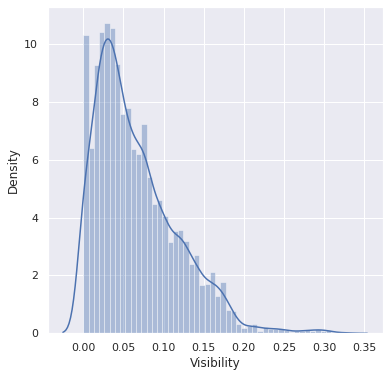

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(data['Visibility']);
plt.show()
plt.savefig('Visibility.png', dpi=300)
#files.download('Visibility.png')

Most list prices are falling into four bunckes \$50,\$100, \$175, and \$225. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


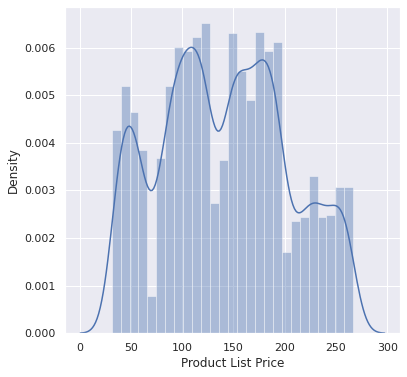

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(data['Product List Price']);
plt.show()
plt.savefig('Product List Price.png', dpi=300)
#files.download('Product List Price.png')

Sales purchases range from \$1-\$10,000 range, with most taking place in the \$1-\$1,000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


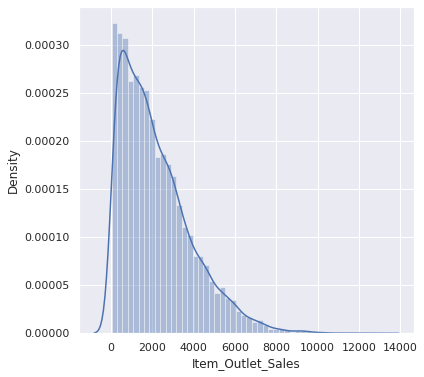

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Outlet_Sales']);
plt.show()
plt.savefig('Item_Outlet_Sales.png', dpi=300)
#files.download('Item_Outlet_Sales.png')

When Big Mart decides to open stores in any given year, 930 seems to be the target number of stores they generally open.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


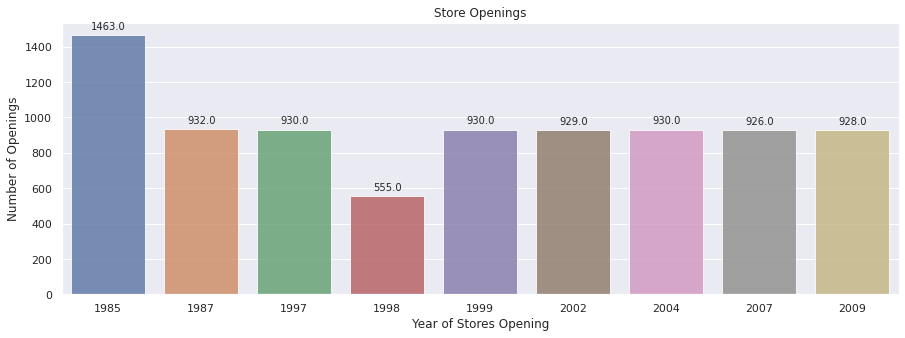

<Figure size 432x288 with 0 Axes>

In [22]:
filt1  = data['Year Opened'].value_counts()
filt1 = filt1[:,]
plt.figure(figsize=(15,5))
bar = sns.barplot(filt1.index, filt1.values, alpha=0.8)
for x in bar.patches:
    bar.annotate(format(x.get_height(), '.1f'), 
                   (x.get_x() + x.get_width() / 2., x.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Store Openings')
plt.ylabel('Number of Openings', fontsize=12)
plt.xlabel('Year of Stores Opening', fontsize=12)
plt.show()
plt.savefig('Store Opening Years.png', dpi = 300)
#files.download('Store Opening Years.png')

Nearly 2/3 of the products sold are low fat products.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


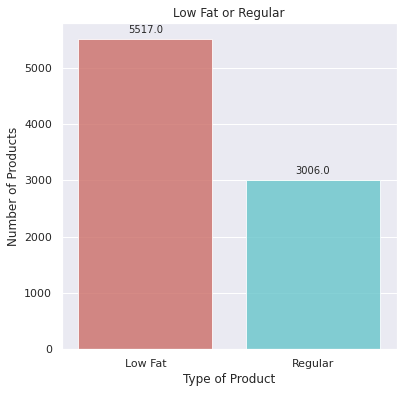

<Figure size 432x288 with 0 Axes>

In [23]:
filt1  = data['Low Fat or Regular'].value_counts()
filt1 = filt1[:,]
plt.figure(figsize=(6,6))
bar = sns.barplot(filt1.index, filt1.values, alpha=0.8, palette='hls')
for x in bar.patches:
    bar.annotate(format(x.get_height(), '.1f'), 
                   (x.get_x() + x.get_width() / 2., x.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Low Fat or Regular')
plt.ylabel('Number of Products', fontsize=12)
plt.xlabel('Type of Product', fontsize=12)
plt.show()
plt.savefig('Low Fat or Regular.png', dpi = 300)
#files.download('Low Fat or Regular.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


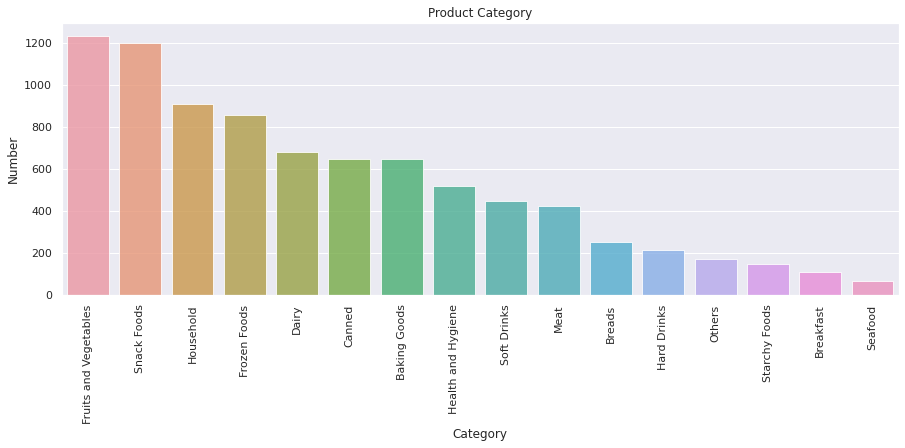

<Figure size 432x288 with 0 Axes>

In [24]:
filt  = data['Product Category'].value_counts()
filt = filt[:,]
plt.figure(figsize=(15,5))
sns.barplot(filt.index, filt.values, alpha=0.8)
plt.title('Product Category')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show()
plt.savefig('Product Category.png', dpi = 300)
#files.download('Product Category.png')

Approximately 50% of all products sold fall within 4 categories

Fruits and Vegetables    14.4%

Snack Foods              14.1%

Household                10.7%

Frozen Foods             10.0%

In [25]:
data['Product Category'].value_counts(normalize=True)

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Product Category, dtype: float64

Nearly 60% of stores are 'Medium Size' stores

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


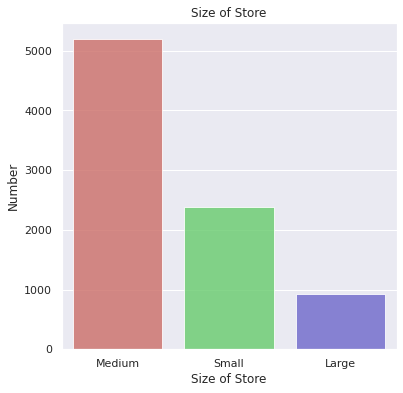

<Figure size 432x288 with 0 Axes>

In [26]:
filt  = data['Size of Store'].value_counts()
filt = filt[:,]
plt.figure(figsize=(6,6))
sns.barplot(filt.index, filt.values, alpha=0.8, palette='hls')
plt.title('Size of Store')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Size of Store', fontsize=12)
plt.xticks()
plt.show()
plt.savefig('Size of Store.png', dpi = 300)
#files.download('Size of Store.png')

In [27]:
data['Size of Store'].value_counts(normalize=True)

Medium    0.610466
Small     0.280183
Large     0.109351
Name: Size of Store, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


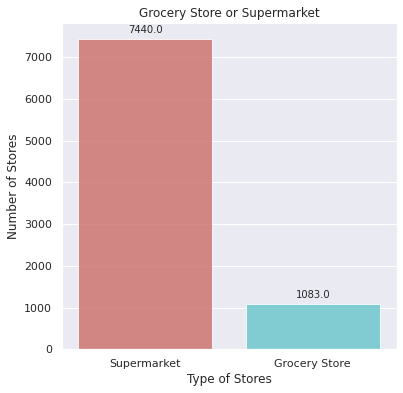

<Figure size 432x288 with 0 Axes>

In [28]:
filt1  = data['Grocery Store or Supermarket'].value_counts()
filt1 = filt1[:,]
plt.figure(figsize=(6,6))
bar = sns.barplot(filt1.index, filt1.values, alpha=0.8, palette='hls')
for x in bar.patches:
    bar.annotate(format(x.get_height(), '.1f'), 
                   (x.get_x() + x.get_width() / 2., x.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Grocery Store or Supermarket')
plt.ylabel('Number of Stores', fontsize=12)
plt.xlabel('Type of Stores', fontsize=12)
plt.show()
plt.savefig('Grocery Store or Supermarket.png', dpi = 300)
#files.download('Grocery Store or Supermarket.png')

In [29]:
data['Grocery Store or Supermarket'].value_counts()

Supermarket      7440
Grocery Store    1083
Name: Grocery Store or Supermarket, dtype: int64

Changing Categorical Values to Numeric Values

In [30]:
data.dtypes

Product ID                       object
Weight                          float64
Low Fat or Regular               object
Visibility                      float64
Product Category                 object
Product List Price              float64
Store ID                         object
Year Opened                       int64
Area of Store                    object
Grocery Store or Supermarket     object
Item_Outlet_Sales               float64
Size of Store                    object
dtype: object

Categorical Columns are:

Product ID

Low Fat or Regular

Product Category 

Store ID 

Year Opened (Treating Year Opened as a Category)

Area of Store

Grocery Store or Supermarket 

Size of Store 

In [31]:
encoder = LabelEncoder()

In [32]:
data['Product ID'] = encoder.fit_transform(data['Product ID'])

In [33]:
data['Weight'] = encoder.fit_transform(data['Weight'])

In [34]:
data['Low Fat or Regular'] = encoder.fit_transform(data['Low Fat or Regular'])

In [35]:
data['Visibility'] = encoder.fit_transform(data['Visibility'])

In [36]:
data['Product Category'] = encoder.fit_transform(data['Product Category'])

In [37]:
data['Product List Price'] = encoder.fit_transform(data['Product List Price'])

In [38]:
data['Store ID'] = encoder.fit_transform(data['Store ID'])

In [39]:
data['Year Opened'] = encoder.fit_transform(data['Year Opened'])

In [40]:
data['Area of Store'] = encoder.fit_transform(data['Area of Store'])

In [41]:
data['Grocery Store or Supermarket'] = encoder.fit_transform(data['Grocery Store or Supermarket'])

In [42]:
data['Size of Store'] = encoder.fit_transform(data['Size of Store'])

In [43]:
data.head()

,Product ID,Weight,Low Fat or Regular,Visibility,Product Category,Product List Price,Store ID,Year Opened,Area of Store,Grocery Store or Supermarket,Item_Outlet_Sales,Size of Store
0,156,284,0,664,4,5592,9,4,0,1,3735.1380,1
1,8,57,1,880,14,473,3,8,2,1,443.4228,1
2,662,375,0,715,10,2901,9,4,0,1,2097.2700,1
3,1121,392,1,0,6,4227,0,3,2,0,732.3800,1
4,1297,265,0,0,9,627,1,1,2,1,994.7052,0


Splitting Data into Training and Test Data

In [44]:
y = data.loc[:,'Item_Outlet_Sales'].values

In [45]:
X = data.loc[:, ~data.columns.isin(['Item_Outlet_Sales'])].values

In [46]:
X.shape

(8523, 11)

In [47]:
y.shape

(8523,)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Randon Forest Regression

In [49]:
RFReg = RandomForestRegressor(n_estimators = 100, random_state=42)

In [50]:
RFReg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [51]:
y_pred = RFReg.predict(X_train) #predicting y value, given X_value(X_train)

In [52]:
score = metrics.r2_score(y_train, y_pred) #comparing y prediction to actual y value(y_train)

In [53]:
print('R2 value using Training data is', score)

R2 value using Training data is 0.9376223674497688


In [54]:
y_pred = RFReg.predict(X_test) #predicting y value, given X_value(X_test)

In [55]:
score = metrics.r2_score(y_test, y_pred) #comparing y prediction to actual y value(y_test)

In [56]:
print('R2 value using Testing Data is',score)

R2 value using Testing Data is 0.5601418081831829


In [57]:
data_list =list(data.columns)
# The baseline predictions are the historical Item_Outlet_Sales
baseline_preds = X_test[:, data_list.index('Item_Outlet_Sales')]
# Baseline errors, and display Item_Outlet_Sales baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Item_Outlet_Sales baseline error: $%.2f'% round(np.mean(baseline_errors), 2))

Item_Outlet_Sales baseline error: $2095.84


In [58]:
# The mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: $%.2f'
      % mean_absolute_error(y_test, y_pred))

Mean absolute error: $762.57


In [59]:
estimator_range = [1] + list(range(10, 210, 10))

In [60]:
# List to store the average a scores for each value of n_estimators:
scores = []
# Use train test split with each value of n_estimators (Warning: Slow!).
for estimator in estimator_range:
    RFReg = RandomForestRegressor(n_estimators=estimator,
                                 random_state=42,
                                 bootstrap=True)
    RFReg.fit(X_train, y_train)
    scores.append(RFReg.score(X_test, y_test))

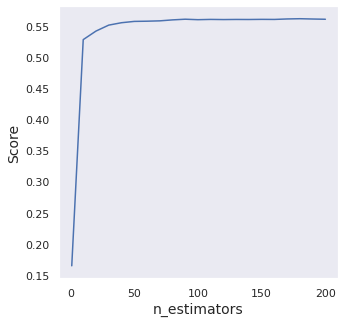

In [61]:
# Visualize which n'estimators leads to highest score
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =14);
axes.set_ylabel('Score', fontsize = 14);
axes.grid()

Important Dependents

In [62]:
data_list = list(data.columns)
data_list = ['Product ID', 'Weight', 'Low Fat or Regular', 'Visibility', 'Product Category', 'Product List Price', 'Store ID', 'Year Opened', 'Area of Store', 'Grocery Store or Supermarket', 'Size of Store']

In [63]:
importance = list(RFReg.feature_importances_)

In [64]:
feature_importances=[(feature_importances, round(importance,2))
for feature_importances, importance in zip(data_list, importance)]

In [65]:
feature_importances

[('Product ID', 0.07),
 ('Weight', 0.05),
 ('Low Fat or Regular', 0.01),
 ('Visibility', 0.09),
 ('Product Category', 0.03),
 ('Product List Price', 0.43),
 ('Store ID', 0.02),
 ('Year Opened', 0.09),
 ('Area of Store', 0.01),
 ('Grocery Store or Supermarket', 0.19),
 ('Size of Store', 0.01)]

In [66]:
feature_importances = sorted(feature_importances,key = lambda x: x[1], reverse = True)

In [67]:
[print('Dependent:{:11} Importance:{}'.format(*pair))for pair in feature_importances];

Dependent:Product List Price Importance:0.43
Dependent:Grocery Store or Supermarket Importance:0.19
Dependent:Visibility  Importance:0.09
Dependent:Year Opened Importance:0.09
Dependent:Product ID  Importance:0.07
Dependent:Weight      Importance:0.05
Dependent:Product Category Importance:0.03
Dependent:Store ID    Importance:0.02
Dependent:Low Fat or Regular Importance:0.01
Dependent:Area of Store Importance:0.01
Dependent:Size of Store Importance:0.01


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


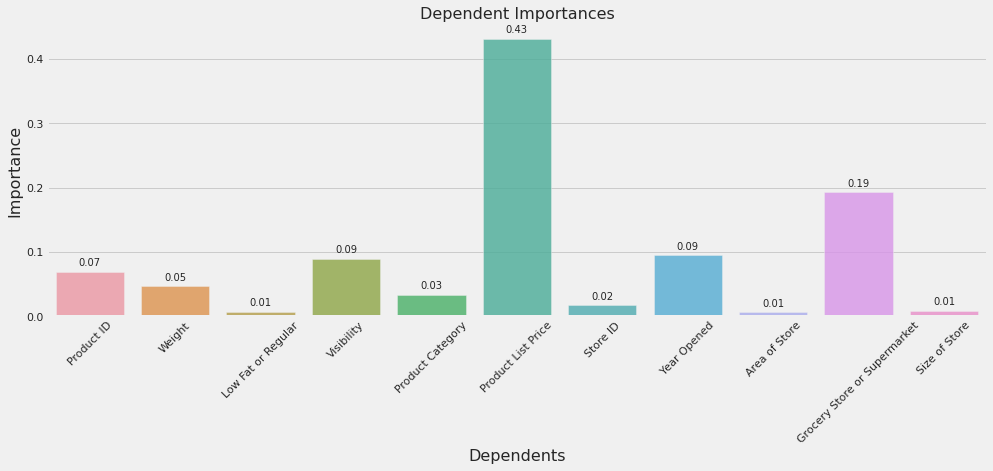

In [68]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
x_values = list(range(len(importance)))
bar = sns.barplot(data_list, importance, orientation = 'vertical', alpha = 0.8)
for x in bar.patches:
    bar.annotate(format(x.get_height(), '.2f'), 
                   (x.get_x() + x.get_width() / 2., x.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel('Importance', fontsize=16);
plt.xlabel('Dependents',fontsize=16);
plt.title('Dependent Importances',fontsize=16);
plt.xticks(rotation=45);
plt.savefig('Dependent Importances.png', dpi = 300)
#files.download('Dependent Importances.png')